A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


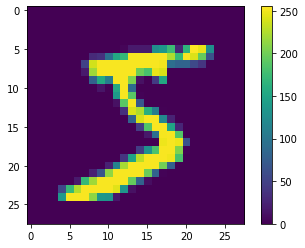

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Normalizando

In [6]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 1.0
x_train.min(): 0.0
x_test.max(): 1.0
x_test.min(): 0.0


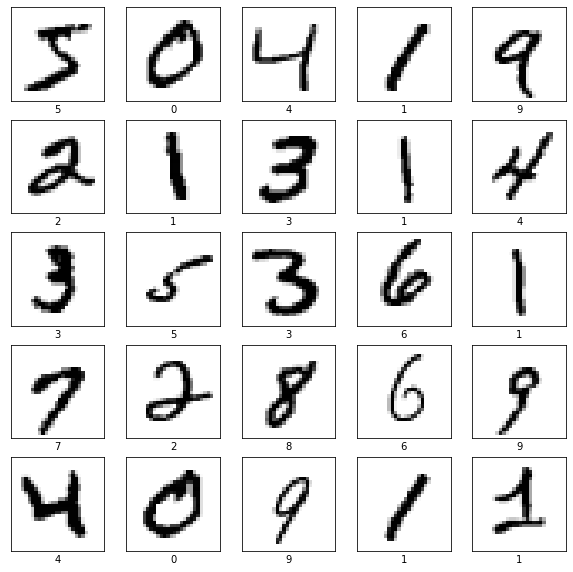

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [10]:
x_train[0].shape

(28, 28)

In [11]:
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28)


In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [13]:
'''model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1), padding = 'valid'))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10))
model1.summary()'''

"model1 = models.Sequential()\n\nmodel1.add(layers.Conv2D(filters=8,\n                         kernel_size=(3,3),\n                         input_shape=(28,28,1), padding = 'valid'))\nmodel1.add(layers.MaxPooling2D(pool_size = (2,2)))\nmodel1.add(layers.Dropout(0.25))\nmodel1.add(layers.Flatten())\nmodel1.add(layers.Dense(32, activation='relu'))\nmodel1.add(layers.Dense(10))\nmodel1.summary()"

In [14]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32))
model1.add(layers.Dense(10))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
____________________________________________________

In [15]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9858 - accuracy: 0.4490
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2945 - accuracy: 0.4182
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3025 - accuracy: 0.3228
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3024 - accuracy: 0.3225
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3024 - accuracy: 0.3229
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3024 - accuracy: 0.3210
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3024 - accuracy: 0.3223
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3021 - accuracy: 0.2460
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026 - accuracy: 0.1828
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

---
# Modelo 2

In [17]:
model2 = models.Sequential()

model2.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1), padding = 'valid'))
model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                21648     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [18]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.9975 - accuracy: 0.3947
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3023 - accuracy: 0.1958
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3026 - accuracy: 0.1601
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3026 - accuracy: 0.1596
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3027 - accuracy: 0.1648
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3026 - accuracy: 0.1692
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3026 - accuracy: 0.1686
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3026 - accuracy: 0.1684
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3026 - accuracy: 0.1688
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l